In [139]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas

In [140]:
# Hydrostatic pressure at node i [mmHg]
# Total Head at node i [mmHg]
# i = 1, 2, 3, 4, 5, 6

# 10 litres in 57.3 seconds
hyplst_1 = np.array([275, 240, 15, 145, 170, 180])
tothd_1 = np.array([28.8, 26.8, 26.4, 24.2, 22.6, 21.2])


# 10 litres in 108 seconds
hyplst_2 = np.array([210, 205, 115, 155, 160, 165])
tothd_2 = np.array([22.0, 21.5, 21.1, 19.4, 17.7, 17.9])

# 10 litres in 190 seconds
hyplst_3 = np.array([130, 120, 95, 107.5, 110, 107.5])
tothd_3 = np.array([14.1, 13.6, 12.3, 11.8, 11.9, 11.1])

## Error Analysis (GUM Type A Evaluation)

## Sample Standard Deviation
To show the variability of the measured values of the quantity X, we use the sample standard deviation:

$s = \sqrt{\dfrac{\sum_{i=1}^n (X_i - \overline{X})^2}{n - 1}}$

In [142]:
def cal_ssd(lst):
    """Returns the sample standard deviation of the measured values of quantity X. """
    def calMean(lst, n):
        s = 0; 
        for i in lst: s += i;
        mean = s/n;
        return mean;
    
    n = len(lst);
    x_bar = calMean(lst, n);
    x_diff = [(i - x_bar)**2 for i in lst];
    x_var = calMean(x_diff, n-1);
    return math.sqrt(x_var);

# Calculate the sample standard deviation for hydrostatic pressure and total head at each node
ssd_hy , ssd_tothd = [], [];
for i in range(0, 6):
    ssd_hy.append(cal_ssd([hyplst_1[i], hyplst_2[i], hyplst_3[i]]))
    ssd_tothd.append(cal_ssd([tothd_1[i], tothd_2[i], tothd_3[i]]))
    print(f"The sample standard deviation of hydrostatic pressure at node {i+1}: {ssd_hy[i]}")
    print(f"The sample standard deviation of total head at node {i+1}: {ssd_tothd[i]}\n")
    

The sample standard deviation of hydrostatic pressure at node 1: 72.62919523166975
The sample standard deviation of total head at node 1: 7.356856212631408

The sample standard deviation of hydrostatic pressure at node 2: 61.71169527191206
The sample standard deviation of total head at node 2: 6.64253967495365

The sample standard deviation of hydrostatic pressure at node 3: 52.91502622129181
The sample standard deviation of total head at node 3: 7.122031545376173

The sample standard deviation of hydrostatic pressure at node 4: 25.04163200219453
The sample standard deviation of total head at node 4: 6.252466180103122

The sample standard deviation of hydrostatic pressure at node 5: 32.145502536643185
The sample standard deviation of total head at node 5: 5.356304696336832

The sample standard deviation of hydrostatic pressure at node 6: 38.26987501068344
The sample standard deviation of total head at node 6: 5.150080905513362



## Standard Error of the mean
The measurement of the variability of the means (if a experiment consisting of measurements repeated many times, then the distribution of menas has its own standard deviation) is represented by the standard deviation of the means (often called the standard error of the mean) as $s(\overline{X})$

$s(\overline{X}) = \dfrac{s}{\sqrt{n}}$

In [143]:
def cal_sderr(ssd, n):
    """Returns the standard deviation of the means"""
    return (ssd / math.sqrt(n));

# Calculate the standard error of the mean for hydrostatic pressure and total head at each node
sm_hy , sm_tothd = [], [];
n = 3;
for i in range(0, 6):
    sm_hy.append(cal_sderr(ssd_hy[i], n))
    sm_tothd.append(cal_sderr(ssd_tothd[i], n))
    print(f"The standard error of the mean for hydrostatic pressure at node {i+1}: {sm_hy[i]}")
    print(f"The standard error of the mean for the total head at node {i+1}: {sm_tothd[i]}\n")  

The standard error of the mean for hydrostatic pressure at node 1: 41.93248541803042
The standard error of the mean for the total head at node 1: 4.247482914752115

The standard error of the mean for hydrostatic pressure at node 2: 35.629263877386585
The standard error of the mean for the total head at node 2: 3.835072069437259

The standard error of the mean for hydrostatic pressure at node 3: 30.550504633038933
The standard error of the mean for the total head at node 3: 4.11190682989994

The standard error of the mean for hydrostatic pressure at node 4: 14.45779297741456
The standard error of the mean for the total head at node 4: 3.609863032181569

The standard error of the mean for hydrostatic pressure at node 5: 18.559214542766743
The standard error of the mean for the total head at node 5: 3.092463958291727

The standard error of the mean for hydrostatic pressure at node 6: 22.09512263927142
The standard error of the mean for the total head at node 6: 2.973400597146491



## Maximum Absolute Percentage Uncertainty

In [144]:
def cal_ab_max_u(sderr, lst, n):
    """Returns the maximum absolute percentage uncertainty"""
    result = 0;
    for j in range(n): 
        tmp = sderr / lst[j] * 100; 
        if (tmp > result):
            result = tmp;
    return result;

# Calculate the maximum absolute percentage uncertainty for hydrostatic pressure and total head at each node
ab_hy , ab_tothd = [], [];
n = 3;
for i in range(0, 6):
    ab_hy.append(cal_ab_max_u(sm_hy[i], 
                              [hyplst_1[i], hyplst_2[i], hyplst_3[i]], n))
    ab_tothd.append(cal_ab_max_u(sm_tothd[i], 
                                 [tothd_1[i], tothd_2[i], tothd_3[i]], n))
    print(f"Max abs percentage uncertainty of hydrostatic pressure at node {i+1}: {ab_hy[i]}")
    print(f"Max abs percentage uncertainty of the total head at node {i+1}: {ab_tothd[i]}\n")  



Max abs percentage uncertainty of hydrostatic pressure at node 1: 32.25575801386955
Max abs percentage uncertainty of the total head at node 1: 30.12399230320649

Max abs percentage uncertainty of hydrostatic pressure at node 2: 29.69105323115549
Max abs percentage uncertainty of the total head at node 2: 28.19905933409749

Max abs percentage uncertainty of hydrostatic pressure at node 3: 203.67003088692624
Max abs percentage uncertainty of the total head at node 3: 33.4301368284548

Max abs percentage uncertainty of hydrostatic pressure at node 4: 13.449109746432148
Max abs percentage uncertainty of the total head at node 4: 30.592059594759057

Max abs percentage uncertainty of hydrostatic pressure at node 5: 16.87201322069704
Max abs percentage uncertainty of the total head at node 5: 25.9870920864851

Max abs percentage uncertainty of hydrostatic pressure at node 6: 20.553602455136204
Max abs percentage uncertainty of the total head at node 6: 26.787392767085507



## Results Calculations from experimental data

Calibrate the Venturi meter and calculate the discharge coefficient

$G = \dfrac{C_D \cdot \rho \cdot A_1 \cdot A_2 \cdot \sqrt{2 \cdot g \cdot \Delta h_v}}{\sqrt{A_1^2 - A_2^2}}$

$\\\\$

Coulson, J.M. Richardson, J.F. Backhurst, J.R. Harker, J.H.. (1999). Coulson and Richardson's Chemical Engineering Volume 1 - Fluid Flow, Heat Transfer and Mass Transfer (6th Edition) - 6.3.5 The Venturi Meter. (pp. 255,256). Elsevier. Retrieved from 
https://app.knovel.com/hotlink/pdf/id:kt007GBHM5/coulson-richardsons-chemical/the-venturi-meter

In [146]:
# Calculate the discharge coefficient


# 10 litres in 57.3 seconds
hyplst_1 = np.array([275, 240, 15, 145, 170, 180])
tothd_1 = np.array([28.8, 26.8, 26.4, 24.2, 22.6, 21.2])


# 10 litres in 108 seconds
hyplst_2 = np.array([210, 205, 115, 155, 160, 165])
tothd_2 = np.array([22.0, 21.5, 21.1, 19.4, 17.7, 17.9])

# 10 litres in 190 seconds
hyplst_3 = np.array([130, 120, 95, 107.5, 110, 107.5])
tothd_3 = np.array([14.1, 13.6, 12.3, 11.8, 11.9, 11.1])

G = [10/57.3, 10/108, 10/190]; #[L/s] = [kg/s] for water
rho = 1000
A1 = 338.6*1e-6 ; # [m^2]
A2 = [i*1e-6 for i in [338.6, 233.5, 84.6, 170.2, 255.2, 338.6]]; #[m^2]

g = 9.81
    
def calDischargeCoeff(G, rho, A1, A2, g, hv):
    tmp1 = G * math.sqrt(A1**2 - A2**2)
    tmp2 = A1 * A2 * math.sqrt(2 * g * hv )
    #print(tmp1)
    #print(tmp2)
    return tmp1 / tmp2
    
    
def printing(val):
    if val == 0: print("There is no difference in A1 and A2 such that:")

CD1 = [];
print("For the given 10 litres in 57.3 seconds flow rate")
for i in range(1, 6):
    CD1.append(calDischargeCoeff(G[0], rho, A1, A2[i], g, tothd_1[0]-tothd_1[i]))
    printing(CD1[i-1])
    print(f"The discharge coefficient at node {i+1}: {CD1[i-1]}")
print("\n")

CD2 = [];
print("For the given 10 litres in 108 seconds flow rate")
for i in range(1, 6):
    CD2.append(calDischargeCoeff(G[1], rho, A1, A2[i], g, tothd_2[0]-tothd_2[i]))
    printing(CD2[i-1])
    print(f"The discharge coefficient at node {i+1}: {CD2[i-1]}")
print("\n")

CD3 = [];
print("For the given 10 litres in 190 seconds flow rate")
for i in range(1, 6):
    CD3.append(calDischargeCoeff(G[2], rho, A1, A2[i], g, tothd_3[0]-tothd_3[i]))
    printing(CD3[i-1])
    print(f"The discharge coefficient at node {i+1}: {CD3[i-1]}")
print("\n")

For the given 10 litres in 57.3 seconds flow rate
The discharge coefficient at node 2: 86.40609373470114
The discharge coefficient at node 3: 291.08687698690943
The discharge coefficient at node 4: 93.30717613262146
The discharge coefficient at node 5: 40.75074284398662
There is no difference in A1 and A2 such that:
The discharge coefficient at node 6: 0.0


For the given 10 litres in 108 seconds flow rate
The discharge coefficient at node 2: 91.68646612959955
The discharge coefficient at node 3: 252.19580557907557
The discharge coefficient at node 4: 65.8473276729766
The discharge coefficient at node 5: 25.961394303803402
There is no difference in A1 and A2 such that:
The discharge coefficient at node 6: 0.0


For the given 10 litres in 190 seconds flow rate
The discharge coefficient at node 2: 52.11651758945658
The discharge coefficient at node 3: 101.3661649772157
The discharge coefficient at node 4: 39.79523419755205
The discharge coefficient at node 5: 20.63103687214385
There is n

<!-- Another way to calculate the discharge coefficient

$G = \dfrac{C_D \cdot \rho \cdot A_1 \cdot A_2 \cdot \sqrt{2 \cdot v \cdot (P_1 - P_2)}}{\sqrt{A_1^2 - A_2^2}}$

$\\\\$ -->

In [171]:
# def calDischargeCoeff(G, rho, A1, A2, v, P1, P2):
#     tmp1 = G * math.sqrt(A1**2 - A2**2)
#     tmp2 = A1 * A2 * math.sqrt(2 * v * (P1 - P2) )
#     print(tmp1)
#     print(tmp2)
#     return tmp1 / tmp2

# Discharge coefficient for 10 litres in 57.3 seconds
# CD1 = [];
# for i in range(6):
#     CD1.append(calDischargeCoeff(G[0], rho, A1, A2[i], v1[i], P1[0], P2[0][i]))

# P1 = [275, 210, 130]
# P2 = [[275, 240, 15, 145, 170, 180], 
#       [210, 205, 115, 155, 160, 165], 
#       [130, 120, 95, 107.5, 110, 107.5]]

# v1 = [G[0]/i for i in A2]
# v2 = [G[1]/i for i in A2]
# v3 = [G[2]/i for i in A2]

# Investigate the pressure changes along the Venturi meter and give a graphical representation of the pressure distribution.



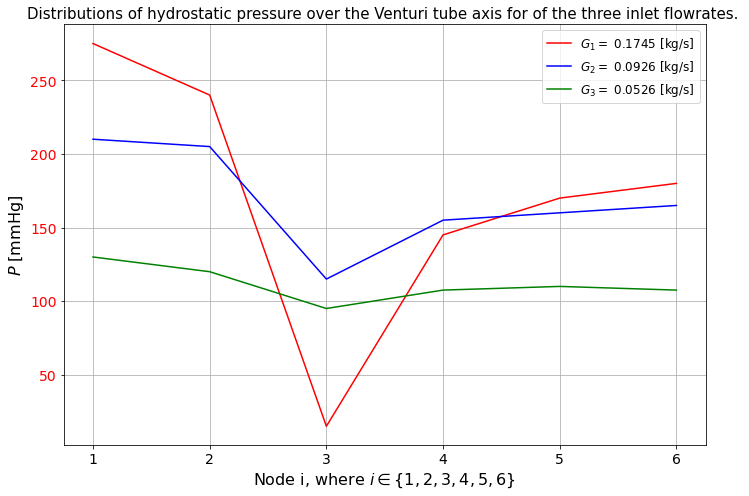

In [172]:
nodes = [1, 2, 3, 4, 5, 6]
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.plot(nodes,hyplst_1,'r-',label='$G_1 =$ '+str(round(G[0], 4)) + ' [kg/s]')
ax1.plot(nodes,hyplst_2,'b-',label='$G_2 =$ '+str(round(G[1], 4)) + ' [kg/s]')
ax1.plot(nodes,hyplst_3,'g-',label='$G_3 =$ '+str(round(G[2], 4)) + ' [kg/s]')
ax1.set_xlabel(r'Node i, where $i \in \{1, 2, 3, 4, 5, 6\}$',fontsize=16)
ax1.set_ylabel(r'$P$ [mmHg]',fontsize=16,color='black')
ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper right',fontsize=12)
ax1.grid(True)

plt.title('Distributions of hydrostatic pressure over the Venturi tube axis for of the three inlet flowrates. ',fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

# Estimate the permanent pressure loss along the Venturi meter. 
$\\\\$
Basu, Swapan Debnath, Ajay Kumar. (2019). Power Plant Instrumentation and Control Handbook - A Guide to Thermal Power Plants (2nd Edition) - 4.4.2.4 Orifice Plate. (pp. 282, 283, 284, 285). Elsevier. Retrieved from 
https://app.knovel.com/hotlink/pdf/id:kt0122PUY8/power-plant-instrumentation/orifice-plate

In [ ]:
# 40% from literature values

# Estimate the losses for the same length of pipe if the diameter remains constant (assuming smooth pipe). 

# Identify the type of flow.

# Estimate the profile of the maximum velocity along the Venturi meter. 


# Calculate the maximum and average velocity at different locations and Reynolds numbers from theory.


# Where are the deviations from the theoretical predictions attributed?

# Compare the converging and diverging sections of the Venturi meter in terms of velocity, total head, and energy losses.